## Name: Brian Mortimer
## Student ID: 20258763

# Etivity 1

In [245]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

## Task 1: Exploratory Data Analysis (EDA)
Open a new Jupyter notebook and name it etivity1.ipynb. In this notebook, perform EDA of the bank dataset by following the notebook Tutorial 1-1 - Exploratory Data Analysis.ipynb as an example.

- Formulate a particular question that might be interesting to answer by exploring the bank dataset (approx. 50 words in a markdown cell).
- Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).
- Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell).
- Generate at least two plots with the combined distribution of attributes. Draw a short conclusion (approx. 150 words in a markdown cell).
- Make sure your conclusions are related to the question you have formulated.




Looking at the description of the columns on the dataset website (https://archive.ics.uci.edu/dataset/222/bank+marketing). I found that target is the subscribed column, this represents a binary value "yes" or "no". The column indicates the if the customer subscribes to a term deposit after a marketing campaign. 

***Question to Answer***: 

Determine how a customers credit history effects their decision to subscribe to the term load deposit.

### 1. Features & Target Information

In [218]:
# Load bank.csv
df = pd.read_csv('bank.csv')

df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [219]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


***Original Data***

Features:
- Age: Customer Age (numeric)
- Job: Type of Job (categorical)
- Marital: Martial status (categorical)
- Education: Level of education (categorical)
- Default: Has credit in default (binary)
- Balance: Average yearly account balance (numeric)
- Housing: Has a housing loan (binary)
- Loan: Has a personal loan (binary)
- Contact: Contact communication type (categorical)
- Day: Last contact day of the month (numeric)
- Month: Last contact month (categorical)
- Duration: Last contact duration in seconds (numeric)
- Campaign: Number of contacts performed during the last campaign (numeric)
- pdays: Number of days that passed after the client was last contacted from a pervious campaign. (numeric) -1 means not previously contacted.
- Previous: Number of contacts performed before this campaign and for this client (numeric)
- poutcome: Outcome of the previous campaign (categorical)

Target:
- Subscribed: Has client subscribed to the term deposit (binary)

In [220]:
def get_missing_values(df):
    """
    Function to get the missing values in a dataframe
    """
    # Get the missing values
    missing = df.isnull().sum()
    
    # Add a percentage column
    missing = pd.DataFrame(missing, columns=['Missing'])
    missing['Percentage'] = (missing['Missing'] / len(df)) * 100
    
    # Sort the missing values in descending order
    missing = missing.sort_values(by='Missing', ascending=False)
    
    # Display the missing values
    missing = missing.reset_index()
    missing.columns = ['Feature', 'Missing', 'Percentage']
    
    return missing

# Get the missing values
missing = get_missing_values(df)
missing

,Feature,Missing,Percentage
0,poutcome,454,22.70
1,contact,191,9.55
2,education,104,5.20
3,age,12,0.60
4,job,10,0.50
5,default,0,0.00
6,balance,0,0.00
7,housing,0,0.00
8,loan,0,0.00
9,day,0,0.00


In [158]:
# Convert binary columns to 0 and 1
binary_columns = ["default", "housing", "loan", "subscribed"]

for col in binary_columns:
    if df[col].dtype == 'object':
        # Convert 'yes'/'no' to 1/0
        df[col] = df[col].map({'yes': 1, 'no': 0})
        print("Converted column to binary:", col)
    else:
        print("Column already in binary format:", col)

Converted column to binary: default
Converted column to binary: housing
Converted column to binary: loan
Converted column to binary: subscribed


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   int64  
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   int64  
 7   loan        2000 non-null   int64  
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   int64  
dtypes: float64(1), int64(10), object(6)
memory usage: 265.8+ KB


#### 2. Numerical Statistics

In [160]:
df.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,subscribed
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,0.007500,1413.663500,0.481500,0.125000,13.851500,292.020500,1.909500,167.896000,2.561500,0.500000
std,12.724358,0.086299,3131.224213,0.499783,0.330802,9.712189,221.557295,1.378862,131.754126,3.400735,0.500125
min,18.000000,0.000000,-980.000000,0.000000,0.000000,1.000000,7.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,201.500000,0.000000,0.000000,5.000000,146.000000,1.000000,75.750000,1.000000,0.000000
50%,38.000000,0.000000,551.000000,0.000000,0.000000,12.000000,236.000000,1.000000,182.000000,2.000000,0.500000
75%,50.000000,0.000000,1644.500000,1.000000,0.000000,23.000000,379.000000,2.000000,251.000000,3.000000,1.000000
max,93.000000,1.000000,81204.000000,1.000000,1.000000,31.000000,1823.000000,11.000000,854.000000,55.000000,1.000000


The numerical statistics paint an interesting picture of the people in this dataset.
- Less than 50% of people have a mortgage. (48.15%)
- Less than 25% of people have a personal loan. (12.5%)
- 50% of people exactly subscribed to the term deposit product.
- 0.75% of people have defaulted on their debt in the past.

These results don't tell us much about the initial question we proposed.

C:\Users\morti\AppData\Local\Temp\ipykernel_1144\1356905673.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


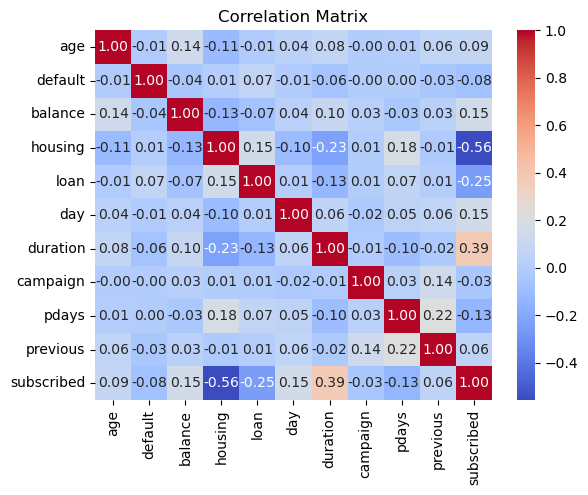

In [161]:
# Correlation matrix
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows the following information about the dataset:
- The duration has a positive correlation with the subscribed target. This makes sense shorter duration with the client likely means they rejected quickly.
- Housing and Personal loans have a negative correlation with the subscribed target. This makes sense because people that are in debt likely have less ability to save money in term deposit product.
- Balance has a weak positive correlation with subscribed. This is surprising I would have assumed that people with a lot of savings would be willing to take part in a term deposit product to save further.
- Previous campaign efforts don't seem to impact the subscription decisions much.

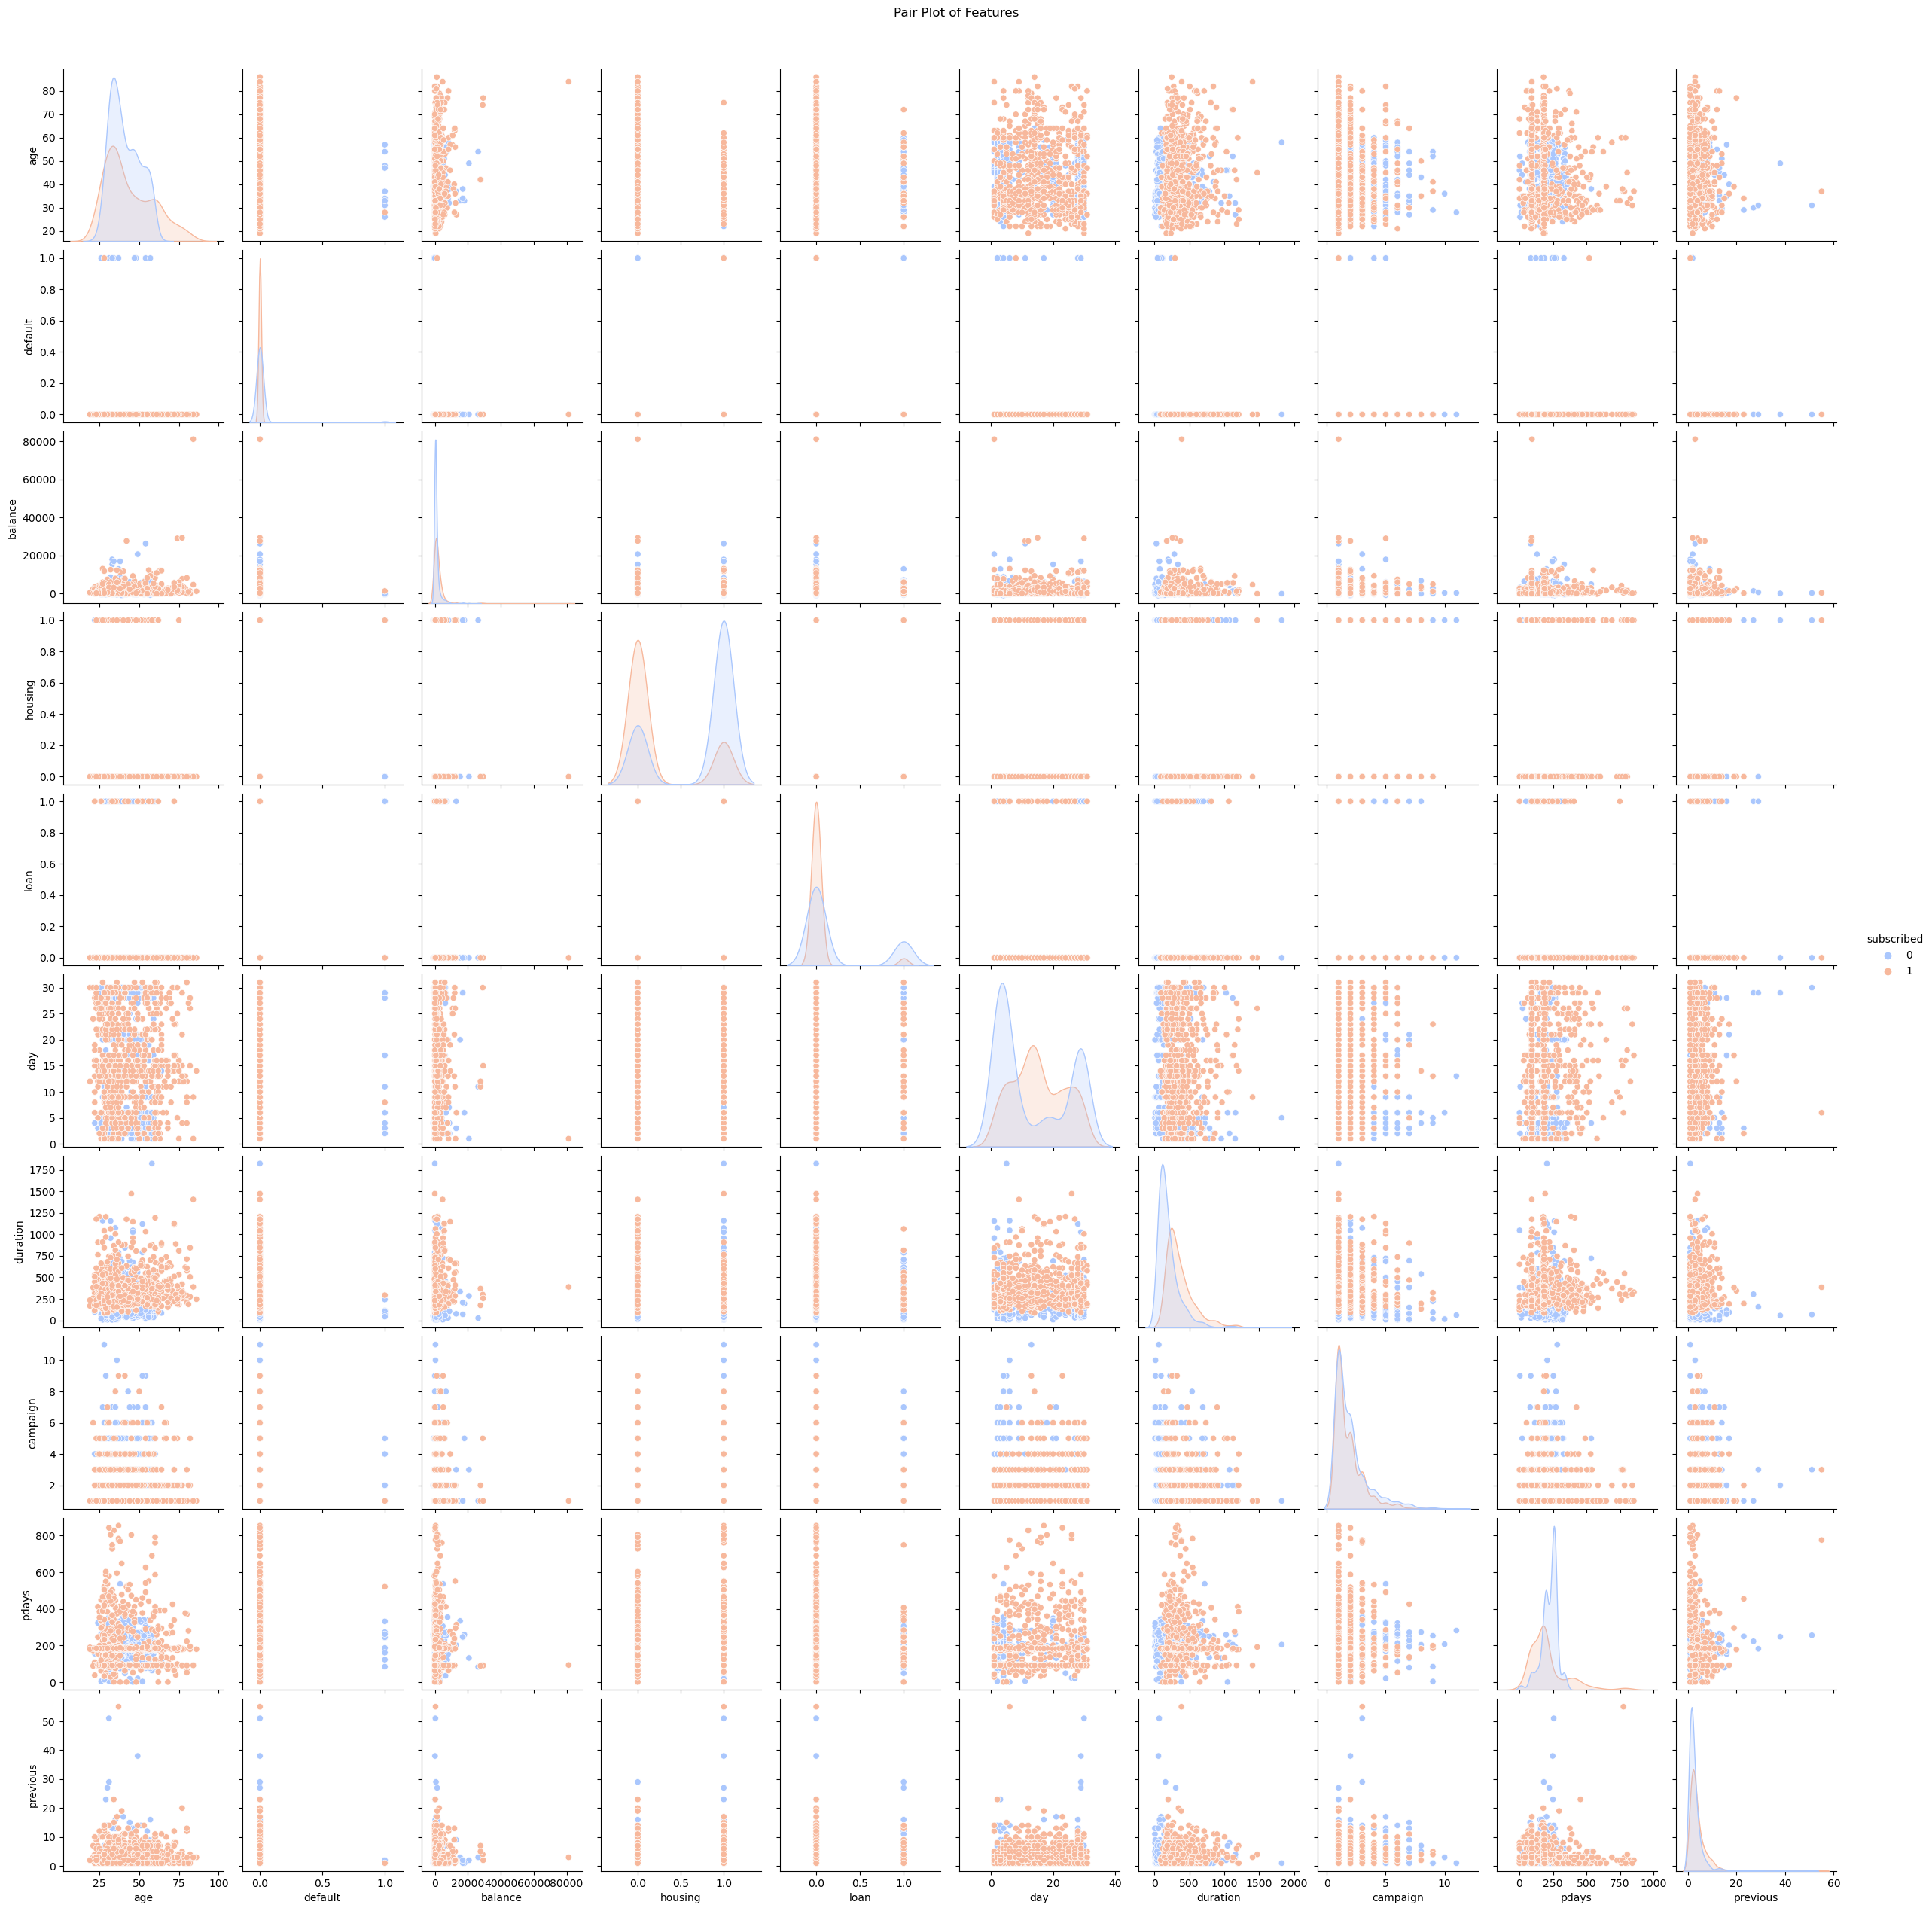

In [162]:
# Produce pair plots
sns.pairplot(df.dropna(), hue='subscribed', palette='coolwarm')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

The pair plots above can be used to highlight some interesting relationships:
- The housing and loan plots show that there is a low amount of people with debt that subscribed to the term deposition.
- The bank balance is generally higher for people which have not subscribed to the term deposition.
- I would have assumed older people would have higher bank balance but the balance vs age graph shows that this is not completely correct. The general bank balance is relatively low. See below graph.

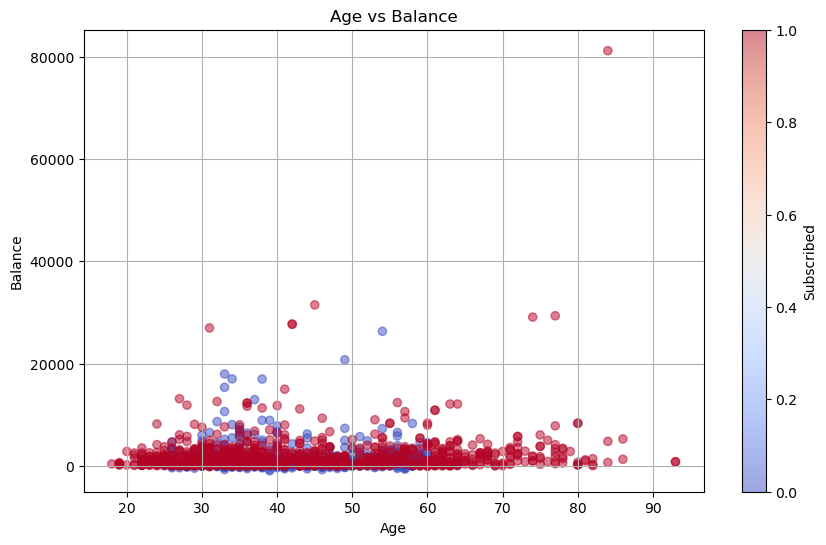

In [ ]:
# Scatter plot of age vs balance
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['balance'], c=df['subscribed'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Subscribed')
plt.title('Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.grid()
plt.show()

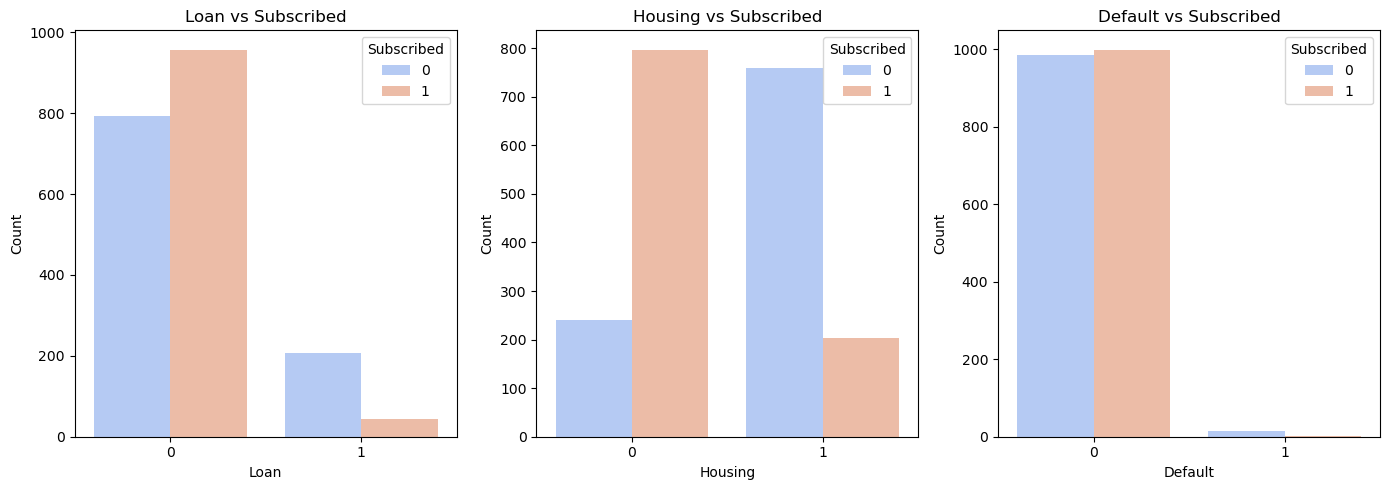

In [164]:
# Plot Housing & Loan vs Subscribed
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='loan', hue='subscribed', data=df, palette='coolwarm')
plt.title('Loan vs Subscribed')
plt.xlabel('Loan')
plt.ylabel('Count')
plt.legend(title='Subscribed', loc='upper right')

plt.subplot(1, 3, 2)
sns.countplot(x='housing', hue='subscribed', data=df, palette='coolwarm')
plt.title('Housing vs Subscribed')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.legend(title='Subscribed', loc='upper right')

plt.subplot(1, 3, 3)
sns.countplot(x='default', hue='subscribed', data=df, palette='coolwarm')
plt.title('Default vs Subscribed')
plt.xlabel('Default')
plt.ylabel('Count')
plt.legend(title='Subscribed', loc='upper right')
plt.tight_layout()
plt.show()

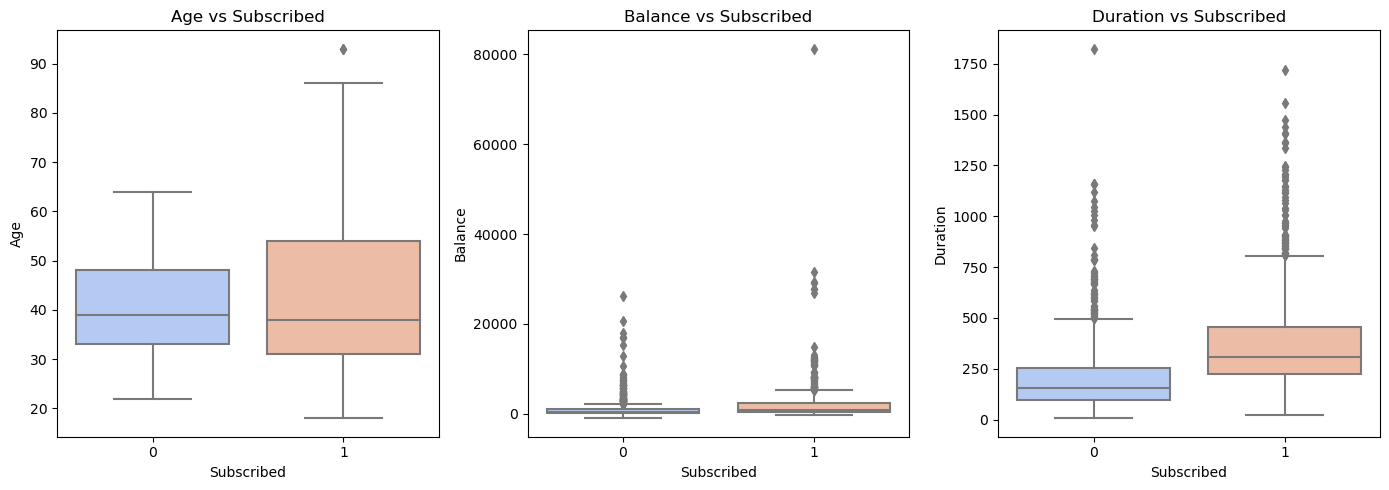

In [165]:
# Box Plots for numerical features
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='subscribed', y='age', data=df, palette='coolwarm')
plt.title('Age vs Subscribed')
plt.xlabel('Subscribed')
plt.ylabel('Age')

plt.subplot(1, 3, 2)
sns.boxplot(x='subscribed', y='balance', data=df, palette='coolwarm')
plt.title('Balance vs Subscribed')
plt.xlabel('Subscribed')
plt.ylabel('Balance')

plt.subplot(1, 3, 3)
sns.boxplot(x='subscribed', y='duration', data=df, palette='coolwarm')
plt.title('Duration vs Subscribed')
plt.xlabel('Subscribed')
plt.ylabel('Duration')

plt.tight_layout()
plt.show()

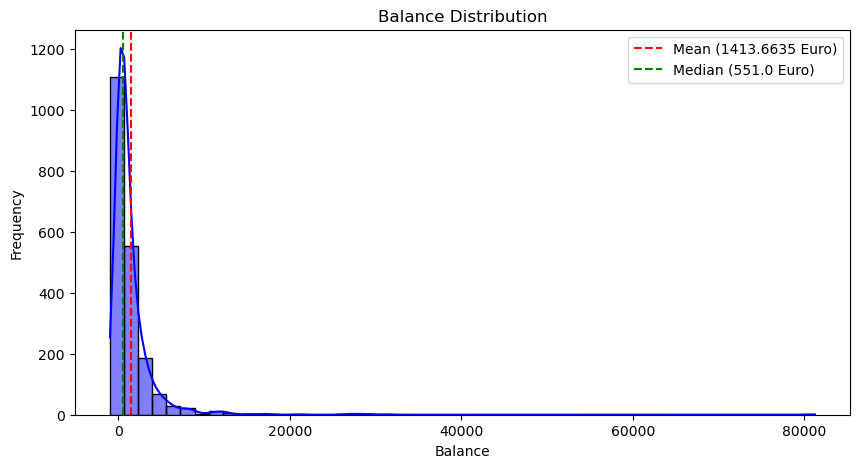

In [166]:
# Balance Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['balance'], bins=50, kde=True, color='blue')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.axvline(df['balance'].mean(), color='red', linestyle='--', label=f"Mean ({df['balance'].mean()} Euro)")
plt.axvline(df['balance'].median(), color='green', linestyle='--', label=f"Median ({df['balance'].median()} Euro)")
plt.legend()
plt.show()

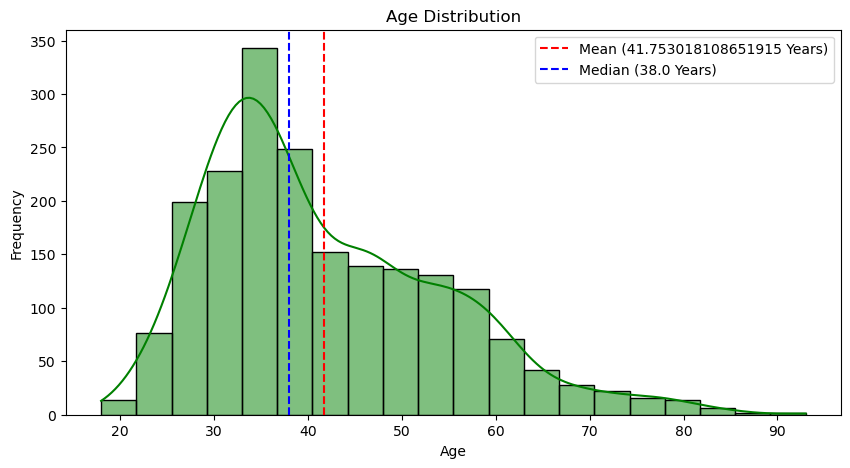

In [167]:
# Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=20, kde=True, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(df['age'].mean(), color='red', linestyle='--', label=f"Mean ({df['age'].mean()} Years)")
plt.axvline(df['age'].median(), color='blue', linestyle='--', label=f"Median ({df['age'].median()} Years)")
plt.legend()
plt.show()

#### 3. Categorical Statistics

In [170]:
# Load the original dataset to reset conversion of binary columns
df = pd.read_csv('bank.csv')

Categorical columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')
Grid size for categorical features: 5


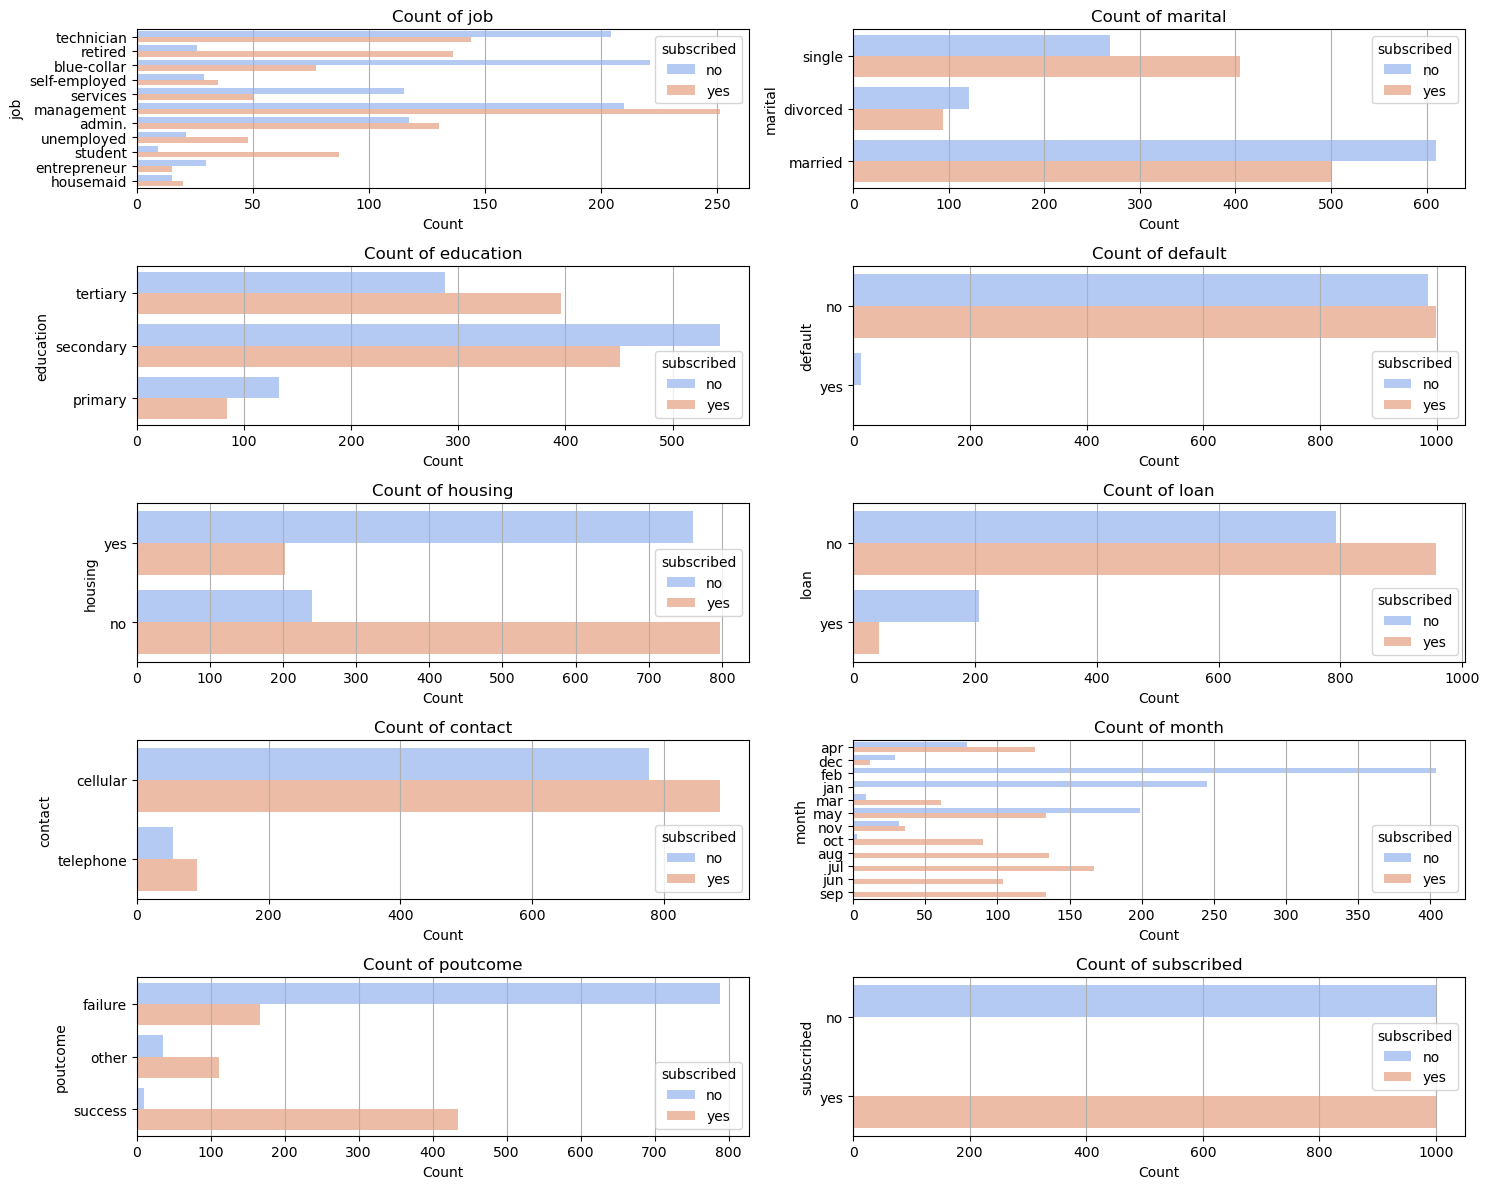

In [172]:
# Counts of each categorical feature
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# Calculate the grid size for subplots
n_categorical = len(categorical_columns)
grid_size = (n_categorical // 2) + (n_categorical % 2)
print("Grid size for categorical features:", grid_size)

# Make a grid of subplots for each categorical feature
plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(grid_size, 2, i)
    sns.countplot(y=col, data=df, hue="subscribed", palette='coolwarm')
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.grid(axis='x')
    plt.tight_layout()

plt.show()


From the above counts we can observe a few interesting conclusions:
- Looking at the job graph the following job types preferred to subscribe to the term deposit: Students, retired, unemployed, admin and management and self employed. Student is a surprising inclusion in this list.
- Single people are more likely than married people to subscribe.
- As noted previously, people with mortgage are more likely to not subscribe. However, contradictory to what we noted earlier, people with personal loans are the opposite.
- The month of the year also seems to affect whether they subscribe. January and February always result in people not subscribing. From August to September people always seem to subscribe to the term deposit.
- From the results here it does seem that if people previously refused to subscribe they are likely to refuse again.

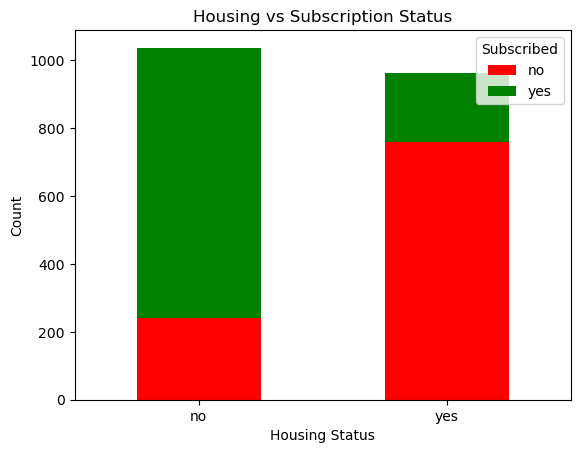

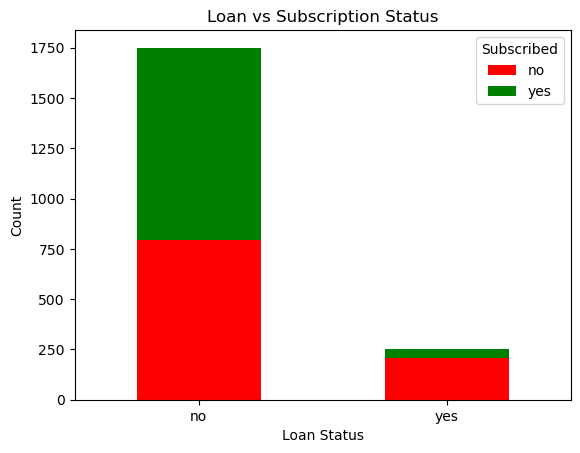

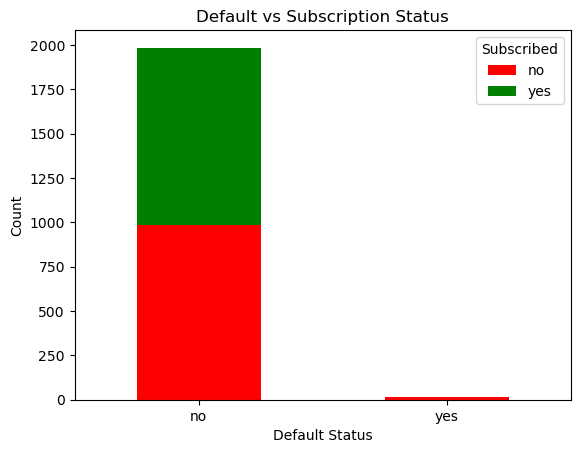

In [179]:
# Plot the Housing vs Subscription status using cross-tabulation
pd.crosstab(df['housing'], df['subscribed']).plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Housing vs Subscription Status')
plt.xlabel('Housing Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Subscribed', loc='upper right')
plt.show()

# Plot the Loan vs Subscription status using cross-tabulation
pd.crosstab(df['loan'], df['subscribed']).plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Loan vs Subscription Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Subscribed', loc='upper right')
plt.show()

# Plot the Default vs Subscription status using cross-tabulation
pd.crosstab(df['default'], df['subscribed']).plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Default vs Subscription Status')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Subscribed', loc='upper right')
plt.show()

#### 4. Conclusion

From the Exploratory Data Analysis (EDA), we have a better understanding of the dataset, here is an outline of some of the key insights found:
- Missing Data: The POutcome feature has a large amount of missing data (~22%), this column will likely be removed in the Data Preparation. the Education and Job features have a number of missing values, however these are not as significant.
- In terms of a quick analysis of the data using the description, it can be seen that just less than 50% (48%) of people have a mortgage and a very small percentage (12.5%) have a personal loan. Finally, a very small percentage of people have defaulted on a loan. This is relevant for the question which is posed.
-  Further analysis of the numerical data shows that, customer age is somewhat skewed to the left, not that significant. Surprisingly, the box plots show that there is not much difference between the people who subscribed based on the their bank balance. 
- The categorical data analysis shows a few different interesting facts, such as the job of the people which subscribed and the marital status.

Finally looking more in-depth at the affect of credit history on the persons decision to subscribe to the term deposit or not. It can be seen from the data that, people who have a mortgage are more likely to refuse to subscribe than people which do not have a mortgage. In addition, people who have a personal loan are more likely to not subscribe, however, if they do not have personal loan it is about 50/50 if they subscribe or not.
With the default feature there is very few people who have defaulted, but for those which have they all subscribed but those who have not subscribed it is about 50/50 if they subscribe or not.

## Task 2: Data Preparation
In the same Jupyter notebook etivity1.ipynb, continue with preparing the bank dataset for machine learning by following the notebook Tutorial 1-2 - Data Preparation.ipynb as an example.

Ensure that you have:

- encoded all categorical attributes as numerical,
- filled in all missing values,
- applied a scaler to rescale features,
- treated outliers and skewed attribute distribution appropriately,
- created at least one new feature from the existing ones.

Shortly describe and justify the data preparation choices you have made in markdown cells.


In [431]:
df_original = pd.read_csv('bank.csv')

df = df_original.copy()
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [432]:
get_missing_values(df)

,Feature,Missing,Percentage
0,poutcome,454,22.70
1,contact,191,9.55
2,education,104,5.20
3,age,12,0.60
4,job,10,0.50
5,default,0,0.00
6,balance,0,0.00
7,housing,0,0.00
8,loan,0,0.00
9,day,0,0.00


#### 1. Encode all Categorical Data

In [433]:
# Encode categorical features
job_mapping = {
    'admin.': 0,
    'blue-collar': 1,
    'entrepreneur': 2,
    'housemaid': 3,
    'management': 4,
    'retired': 5,
    'self-employed': 6,
    'student': 7,
    'technician': 8,
    'unemployed': 9
}

marital_mapping = {
    'divorced': 0,
    'married': 1,
    'single': 2
}

education_mapping = {
    'primary': 0,
    'secondary': 1,
    'tertiary': 2
}

yes_no_mapping = {
    'yes': 1,
    'no': 0
}

contact_mapping = {
    'cellular': 0,
    'telephone': 1
}

month_mapping = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

p_outcome_mapping = {
    'failure': 0,
    'success': 1
}

df['job'] = df['job'].map(job_mapping)
df['marital'] = df['marital'].map(marital_mapping)
df['education'] = df['education'].map(education_mapping)
df['default'] = df['default'].map(yes_no_mapping)
df['housing'] = df['housing'].map(yes_no_mapping)
df['loan'] = df['loan'].map(yes_no_mapping)
df['contact'] = df['contact'].map(contact_mapping)
df['month'] = df['month'].map(month_mapping)
df['poutcome'] = df['poutcome'].map(p_outcome_mapping)
df['subscribed'] = df['subscribed'].map(yes_no_mapping)


df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,8.0,2,2.0,0,392,1,0,0.0,1,4,957,2,131,2,0.0,0
1,39.0,8.0,0,1.0,0,688,1,1,0.0,1,4,233,2,133,1,0.0,0
2,59.0,5.0,1,1.0,0,1035,1,1,0.0,1,4,126,2,239,1,0.0,0
3,47.0,1.0,1,1.0,0,398,1,1,0.0,1,4,274,1,238,2,0.0,0
4,54.0,5.0,1,1.0,0,1004,1,0,0.0,1,4,479,1,307,1,0.0,0


In [434]:
# Check the data types after mapping
df.dtypes

age           float64
job           float64
marital         int64
education     float64
default         int64
balance         int64
housing         int64
loan            int64
contact       float64
day             int64
month           int64
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome      float64
subscribed      int64
dtype: object

#### 2. Missing Values

In [435]:
# find Missing values
get_missing_values(df)

,Feature,Missing,Percentage
0,poutcome,601,30.05
1,contact,191,9.55
2,job,175,8.75
3,education,104,5.20
4,age,12,0.60
5,balance,0,0.00
6,housing,0,0.00
7,loan,0,0.00
8,default,0,0.00
9,day,0,0.00


In [436]:
# poutcome has over 15% missing values, so we will drop it
df = df.drop(columns=['poutcome'])

# Drop age and job rows with missing values
df = df.dropna(subset=['age', 'job'])

# Check the missing values again
get_missing_values(df)

,Feature,Missing,Percentage
0,contact,159,8.765160
1,education,92,5.071665
2,age,0,0.000000
3,job,0,0.000000
4,marital,0,0.000000
5,default,0,0.000000
6,balance,0,0.000000
7,housing,0,0.000000
8,loan,0,0.000000
9,day,0,0.000000


In [437]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
count,1814.000000,1814.000000,1814.000000,1722.000000,1814.000000,1814.000000,1814.000000,1814.000000,1655.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000
mean,42.039140,4.165932,1.230981,1.268873,0.007718,1451.286108,0.470783,0.121279,0.081571,14.000000,5.095921,293.599779,1.910695,166.421169,2.604741,0.518192
std,12.957187,2.906054,0.627649,0.656842,0.087535,3246.039536,0.499283,0.326541,0.273793,9.649569,3.103413,220.923733,1.353130,131.103926,3.465980,0.499807
min,18.000000,0.000000,0.000000,0.000000,0.000000,-980.000000,0.000000,0.000000,0.000000,1.000000,1.000000,7.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,200.500000,0.000000,0.000000,0.000000,5.000000,2.000000,147.000000,1.000000,75.250000,1.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,558.000000,0.000000,0.000000,0.000000,12.000000,5.000000,237.000000,1.000000,182.000000,2.000000,1.000000
75%,51.000000,7.000000,2.000000,2.000000,0.000000,1670.000000,1.000000,0.000000,0.000000,23.000000,7.000000,380.750000,2.000000,250.000000,3.000000,1.000000
max,93.000000,9.000000,2.000000,2.000000,1.000000,81204.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1823.000000,11.000000,854.000000,55.000000,1.000000


In [438]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,32.0,8.0,2,2.0,0,392,1,0,0.0,1,4,957,2,131,2,0
1,39.0,8.0,0,1.0,0,688,1,1,0.0,1,4,233,2,133,1,0
2,59.0,5.0,1,1.0,0,1035,1,1,0.0,1,4,126,2,239,1,0
3,47.0,1.0,1,1.0,0,398,1,1,0.0,1,4,274,1,238,2,0
4,54.0,5.0,1,1.0,0,1004,1,0,0.0,1,4,479,1,307,1,0


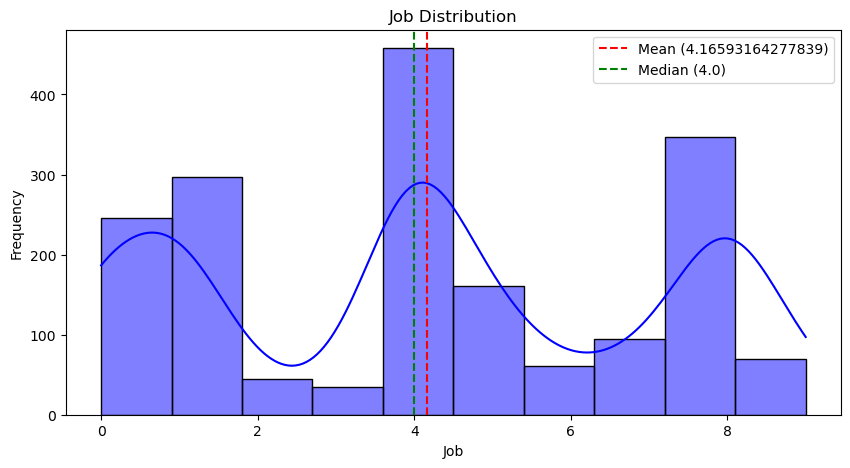

In [439]:
# Distribution of Job
plt.figure(figsize=(10, 5))
sns.histplot(df['job'], bins=10, kde=True, color='blue')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.axvline(df['job'].mean(), color='red', linestyle='--', label=f"Mean ({df['job'].mean()})")
plt.axvline(df['job'].median(), color='green', linestyle='--', label=f"Median ({df['job'].median()})")
plt.legend()
plt.show()

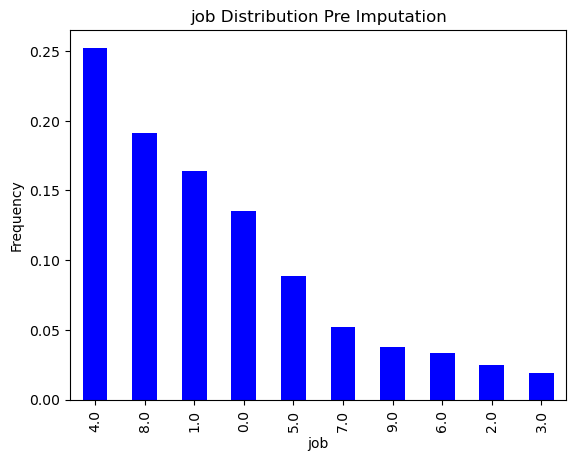

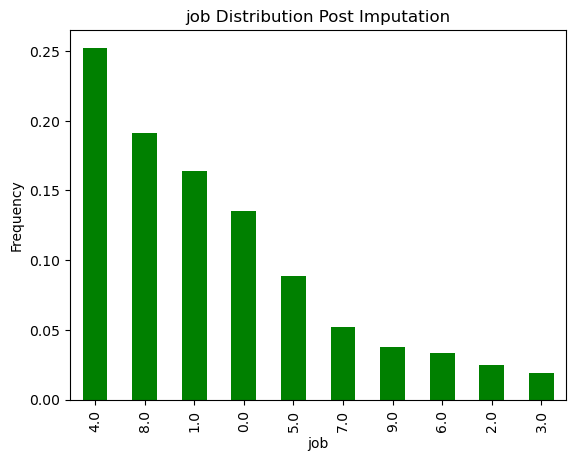

In [440]:
def impute_df_col(df, col):
    """
    Function to impute missing values in a dataframe column
    """

    # Get the distribution of the 'job' column (excluding missing values)
    job_distribution = df[col].value_counts(normalize=True)

    # Define a function to randomly sample based on the distribution
    def impute_job_with_distribution(row):
        if pd.isnull(row[col]):
            return np.random.choice(job_distribution.index, p=job_distribution.values)
        return row[col]

    job_distribution.plot(kind='bar', color='blue')
    plt.title(f'{col} Distribution Pre Imputation')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Impute missing values in col using the distribution
    df[col] = df.apply(impute_job_with_distribution, axis=1)

    # Plot the distribution after imputation
    job_distribution_after = df[col].value_counts(normalize=True)
    job_distribution_after.plot(kind='bar', color='green')
    plt.title(f'{col} Distribution Post Imputation')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Impute the 'job' column
impute_df_col(df, 'job')

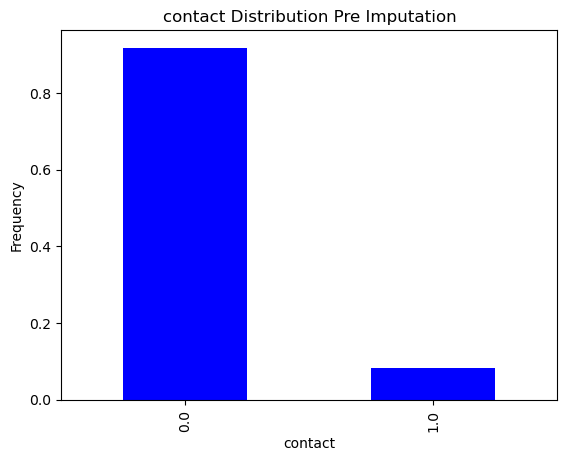

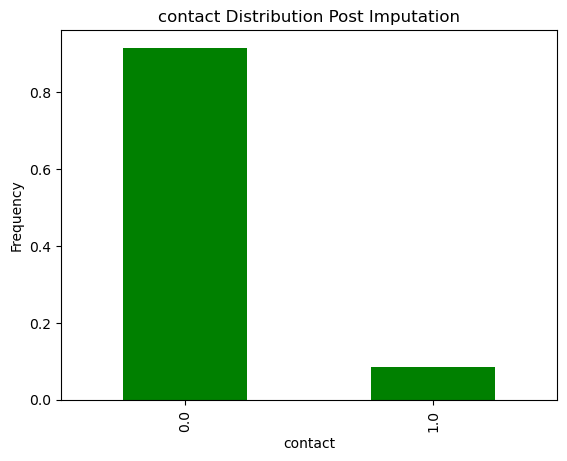

In [441]:
# Impute the contact column
impute_df_col(df, 'contact')

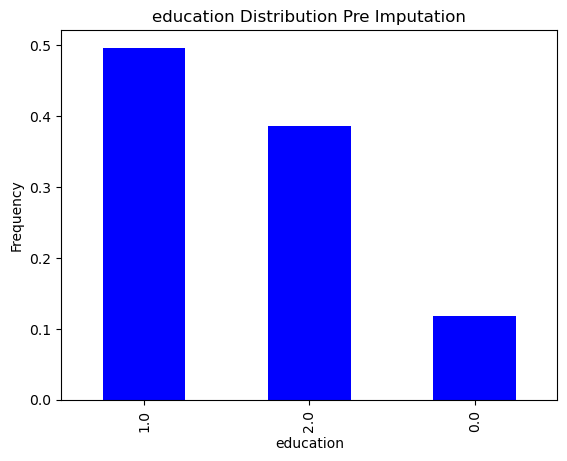

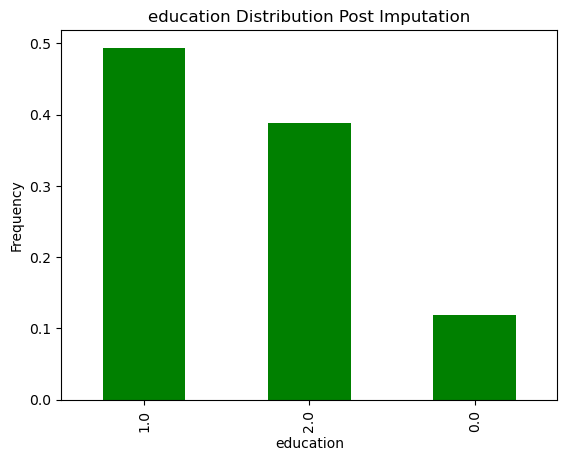

In [442]:
# Impute the education column
impute_df_col(df, 'education')

In [443]:
get_missing_values(df)

,Feature,Missing,Percentage
0,age,0,0.0
1,job,0,0.0
2,marital,0,0.0
3,education,0,0.0
4,default,0,0.0
5,balance,0,0.0
6,housing,0,0.0
7,loan,0,0.0
8,contact,0,0.0
9,day,0,0.0


#### 3. Rescale Features 

In [444]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,32.0,8.0,2,2.0,0,392,1,0,0.0,1,4,957,2,131,2,0
1,39.0,8.0,0,1.0,0,688,1,1,0.0,1,4,233,2,133,1,0
2,59.0,5.0,1,1.0,0,1035,1,1,0.0,1,4,126,2,239,1,0
3,47.0,1.0,1,1.0,0,398,1,1,0.0,1,4,274,1,238,2,0
4,54.0,5.0,1,1.0,0,1004,1,0,0.0,1,4,479,1,307,1,0


In [445]:
# Rescale the numerical features using RobustScaler
scaler = RobustScaler()
rescale_columns = ['age', 'balance', 'duration', 'campaign', 'pdays']

df[rescale_columns] = scaler.fit_transform(df[rescale_columns])

df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,-0.368421,8.0,2,2.0,0,-0.112964,1,0,0.0,1,4,3.080214,1.0,-0.291845,2,0
1,0.000000,8.0,0,1.0,0,0.088465,1,1,0.0,1,4,-0.017112,1.0,-0.280401,1,0
2,1.052632,5.0,1,1.0,0,0.324600,1,1,0.0,1,4,-0.474866,1.0,0.326180,1,0
3,0.421053,1.0,1,1.0,0,-0.108881,1,1,0.0,1,4,0.158289,0.0,0.320458,2,0
4,0.789474,5.0,1,1.0,0,0.303505,1,0,0.0,1,4,1.035294,0.0,0.715308,1,0


In [446]:
# Rescale the other columns to be between 0 and 1
df['job'] = df['job']/df['job'].max()
df['marital'] = df['marital']/df['marital'].max()
df['education'] = df['education']/df['education'].max()
df['day'] = df['day']/df['day'].max()
df['month'] = df['month']/df['month'].max()
df['campaign'] = df['campaign']/df['campaign'].max()
df['pdays'] = df['pdays']/df['pdays'].max()
df['previous'] = df['previous']/df['previous'].max()

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,-0.368421,0.888889,1.0,1.0,0,-0.112964,1,0,0.0,0.032258,0.333333,3.080214,0.1,-0.075893,0.036364,0
1,0.000000,0.888889,0.0,0.5,0,0.088465,1,1,0.0,0.032258,0.333333,-0.017112,0.1,-0.072917,0.018182,0
2,1.052632,0.555556,0.5,0.5,0,0.324600,1,1,0.0,0.032258,0.333333,-0.474866,0.1,0.084821,0.018182,0
3,0.421053,0.111111,0.5,0.5,0,-0.108881,1,1,0.0,0.032258,0.333333,0.158289,0.0,0.083333,0.036364,0
4,0.789474,0.555556,0.5,0.5,0,0.303505,1,0,0.0,0.032258,0.333333,1.035294,0.0,0.186012,0.018182,0


In [447]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
count,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000
mean,0.159955,0.462881,0.615491,0.634509,0.007718,0.607884,0.470783,0.121279,0.083793,0.451613,0.424660,0.242138,0.091069,-0.023183,0.047359,0.518192
std,0.681957,0.322895,0.313824,0.329368,0.087535,2.208942,0.499283,0.326541,0.277153,0.311276,0.258618,0.945128,0.135313,0.195095,0.063018,0.499807
min,-1.105263,0.000000,0.000000,0.000000,0.000000,-1.046614,0.000000,0.000000,0.000000,0.032258,0.083333,-0.983957,0.000000,-0.272321,0.000000,0.000000
25%,-0.368421,0.111111,0.500000,0.500000,0.000000,-0.243280,0.000000,0.000000,0.000000,0.161290,0.166667,-0.385027,0.000000,-0.158854,0.018182,0.000000
50%,0.000000,0.444444,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.387097,0.416667,0.000000,0.000000,0.000000,0.036364,1.000000
75%,0.631579,0.777778,1.000000,1.000000,0.000000,0.756720,1.000000,0.000000,0.000000,0.741935,0.583333,0.614973,0.100000,0.101190,0.054545,1.000000
max,2.842105,1.000000,1.000000,1.000000,1.000000,54.879891,1.000000,1.000000,1.000000,1.000000,1.000000,6.785027,1.000000,1.000000,1.000000,1.000000


#### 4. Treatment of Outliers

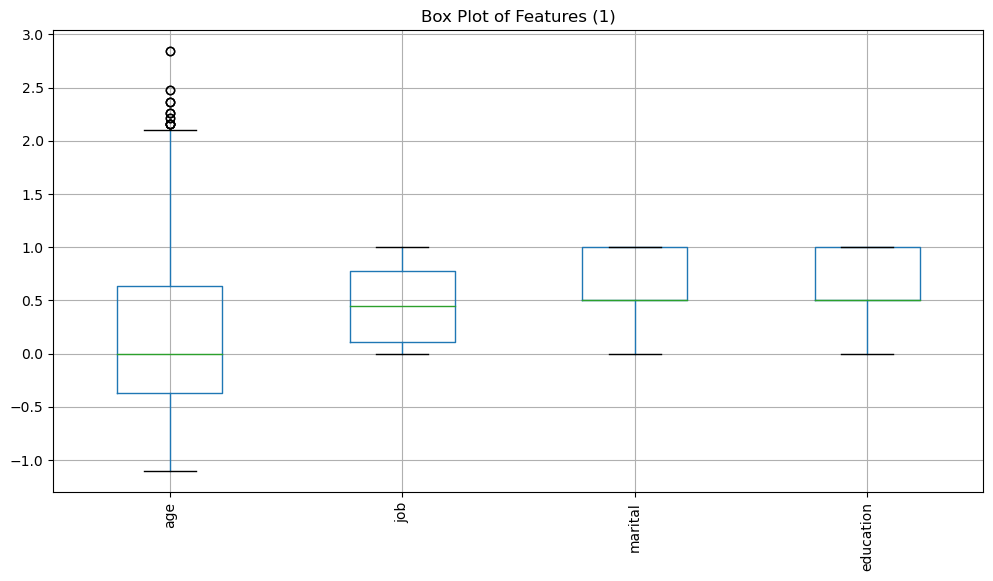

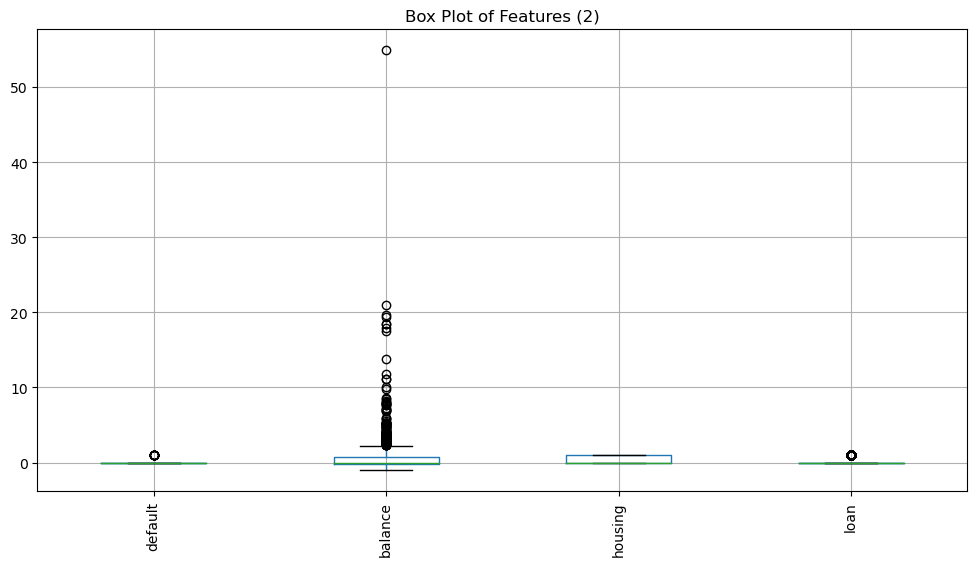

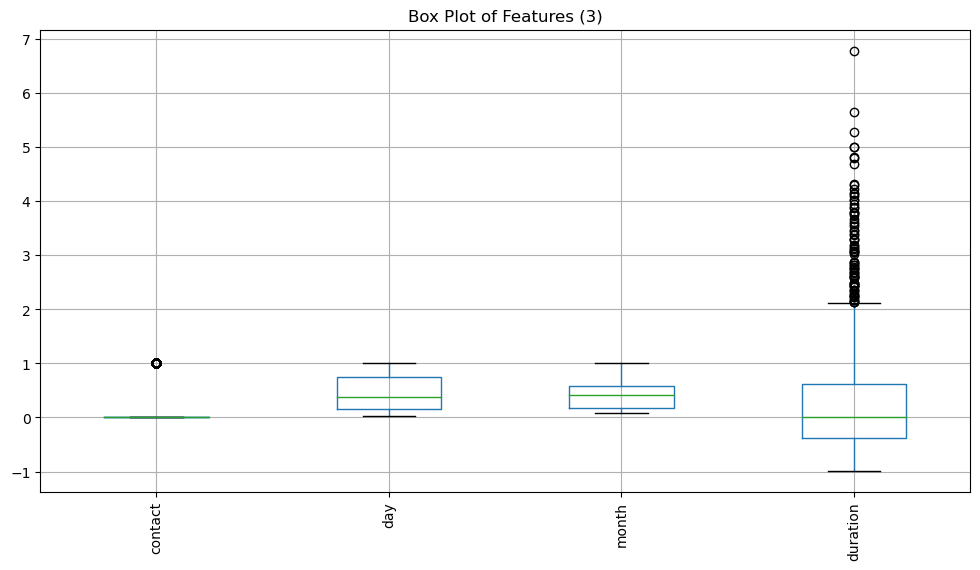

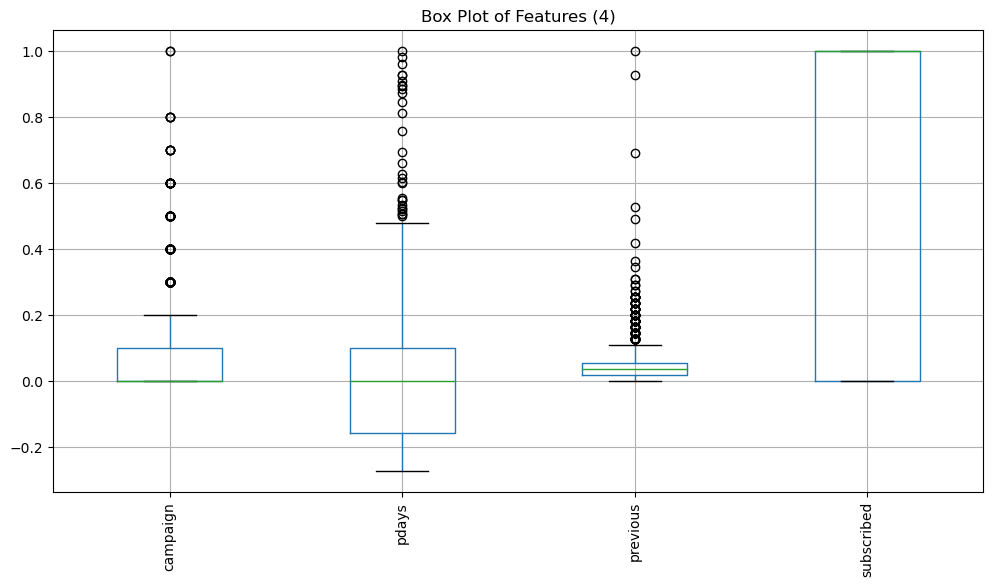

In [448]:
# Create box plots for the numerical features
plt.figure(figsize=(12, 6))
df.boxplot(column=list(df.columns)[0:4])
plt.title('Box Plot of Features (1)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
df.boxplot(column=list(df.columns)[4:8])
plt.title('Box Plot of Features (2)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
df.boxplot(column=list(df.columns)[8:12])
plt.title('Box Plot of Features (3)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
df.boxplot(column=list(df.columns)[12:])
plt.title('Box Plot of Features (4)')
plt.xticks(rotation=90)
plt.show()


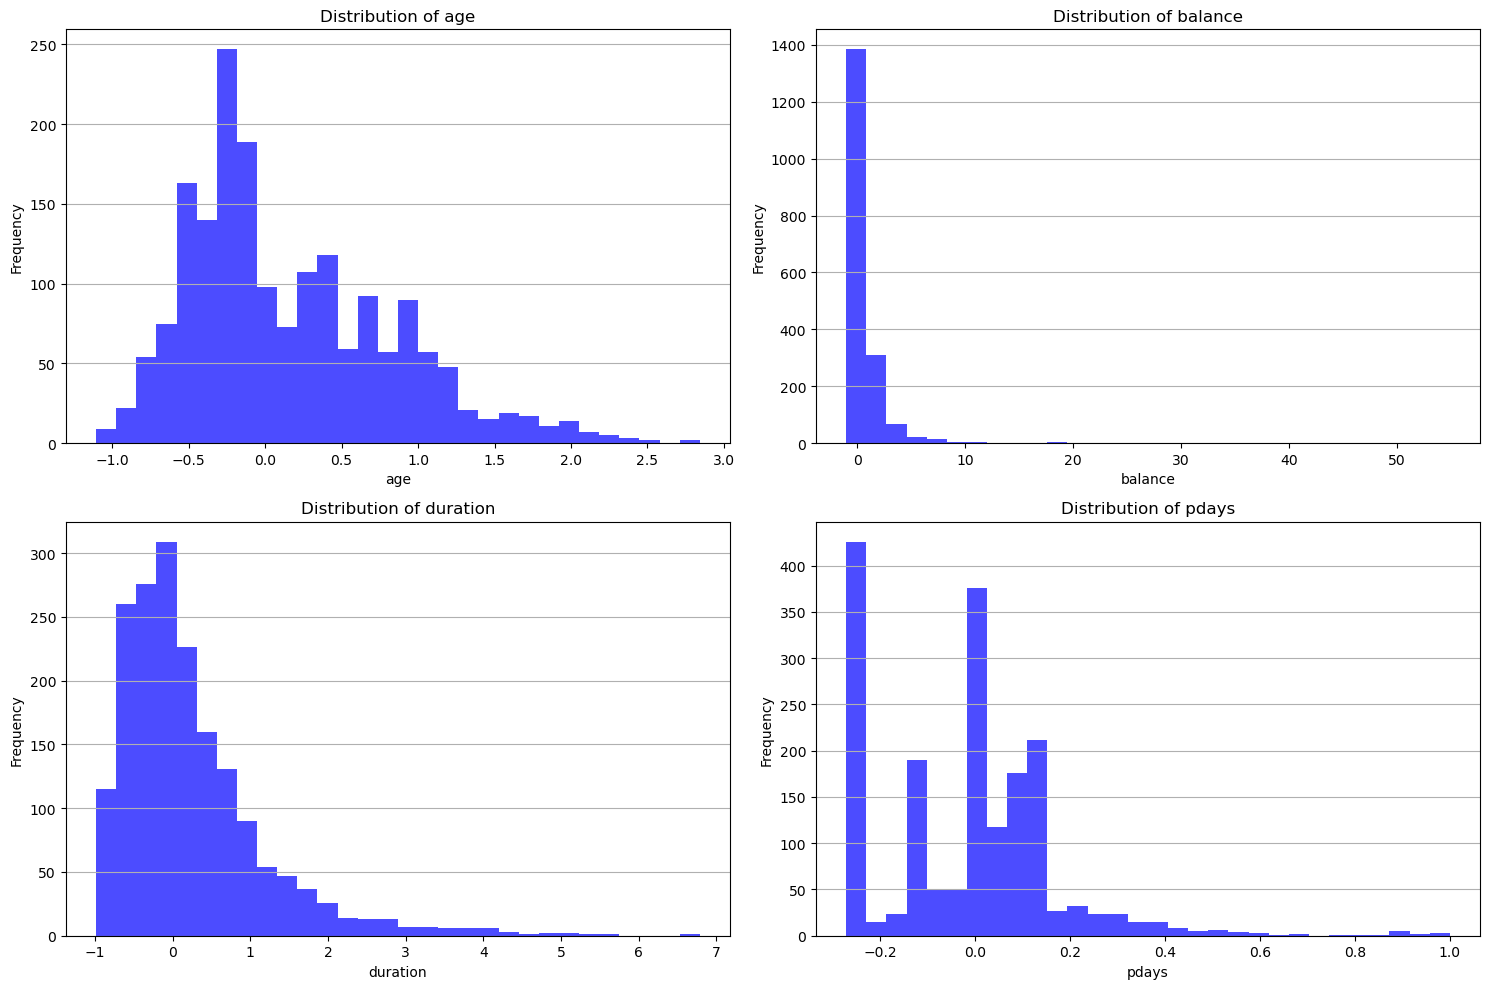

In [449]:
# Columns with outliers
outlier_columns = ['age', 'balance', 'duration', 'pdays']

# Create a figure with subplots for each column
plt.figure(figsize=(15, 10))
# Plot the distribution of each column
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

All these features are skewed to the left, we need fix this before we can train a model on this data.

In [450]:
df[outlier_columns].min()

age        -1.105263
balance    -1.046614
duration   -0.983957
pdays      -0.272321
dtype: float64

In [ ]:
# Log transformation to decrease skewness
# Adding a constant to make all values positive

df['age'] = np.log(df['age'] + abs(df['age'].min()) + 1)
df['balance'] = np.log(df['balance'] + abs(df['balance']) + 1)
df['duration'] = np.log(df['duration'] + 1)
df['pdays'] = np.log(df['pdays'] + 1)
    

Log transformation applied to age
Log transformation applied to balance
Log transformation applied to duration
Log transformation applied to pdays


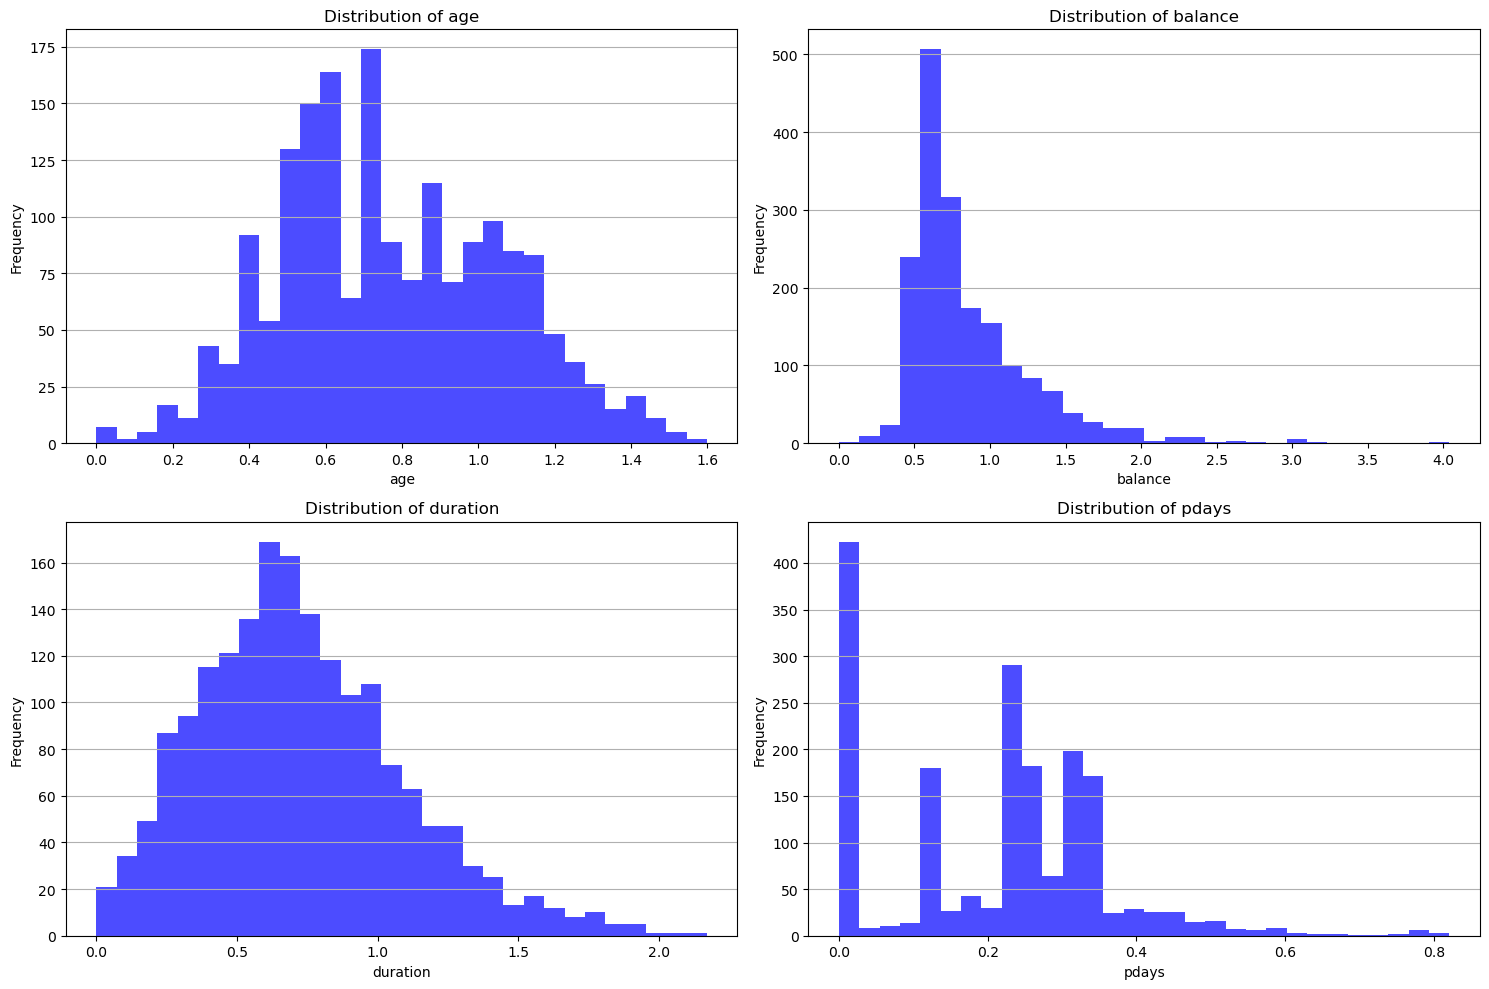

In [428]:
# Create a figure with subplots for each column
plt.figure(figsize=(15, 10))
# Plot the distribution of each column
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### 5. Create New Feature

In [ ]:
# Create a new feauture 'balance_age_ratio'
df['balance_age_ratio'] = df['balance'] / df['age']

### To do: Need to adjust the distribution with -1 values in mind which occur for the pdays column

i

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed,balance_age_ratio
0,0.552069,0.888889,1.0,1.0,0,0.659410,1,0,0.0,0.032258,0.333333,1.622190,0.1,0.179341,0.036364,0,1.194435
1,0.744440,0.888889,0.0,0.5,0,0.758504,1,1,0.0,0.032258,0.333333,0.676431,0.1,0.181825,0.018182,0,1.018892
2,1.149906,0.555556,0.5,0.5,0,0.863402,1,1,0.0,0.032258,0.333333,0.411507,0.1,0.305382,0.018182,0,0.750846
3,0.926762,0.111111,0.5,0.5,0,0.661519,1,1,0.0,0.032258,0.333333,0.761855,0.0,0.304285,0.036364,0,0.713796
4,1.062894,0.555556,0.5,0.5,0,0.854466,1,0,0.0,0.032258,0.333333,1.105009,0.0,0.377294,0.018182,0,0.803905


# Learning From Others
In Cian Moore's post (https://learn.ul.ie/d2l/le/49292/discussions/threads/76510/View) I seen a useful comment about the poutcome column which states that the null values in this column are actually valid results. I had to redo my approach to account for this. 